# Introduction

The dataset used gathers information of wildfires in Spain from 2001 to 2015. The data comes from the Estadística General de Incendios Forestales (EGIF) made by the Centro de Coordinación de la Información Nacional de Incendios Forestales (CCINIF), and this information is provided by each Autonomous Community yearly. 

The dataset has the following information:

* id |  Identifier
* superficie |	Forest area burned, in hectares
* fecha	| Fire detection date (yyyy-mm-dd format)
* lat |	Geographical latitude  of the wildfire origin
* lng	| Geographical longitude  of the wildfire origin
* latlng_explicit |	Informs whether the geographical coordinates were available (1) or the coordinates of the origin municipality were used instead (0)
* comunidad	| Autonomus community identifier
* provincia	| Province identifier
* municipio	| Name of the municipality
* causa	| Wildfire cause
* causa_supuesta	| 1 if the the cause is assumed, otherwise is blank
* causa_desc	| Wildfire description identifier
* muertos	| Number of deceased
* heridos	| Number of injured
* time_ctrl	| Time lapsed until the fire is controled (in minutes)
* time_ext	| Time lapsed until the fire extinction(in minutes)
* personal	| Number of people that participated in the fire extinction (includes technicians, forestry agents, brigades, firefighters, volunteers, civil guards and military)
* medios	| Number of ground and aerial means involved in extinguishing the fire (including fire engines, bulldozers, tractors, airplanes and others)
* gastos	| Extinguishing costs associated with the fire as reported in EGIF
* perdidas	| Economic losses associated with the fire as reported in EGIF	 

We will now proceed to explore and clean the dataset.

In [8]:
# needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("fires-all.csv", parse_dates = ["fecha"], index_col="fecha")

In [47]:
df.head().transpose()

fecha            2001-03-18  2001-03-24           2001-04-16  2001-05-25  \
id               2001010001  2001010004           2001010005  2001010008   
superficie              3.7         1.5                  1.5         7.5   
lat                 42.9547     42.5522              48.3025     42.9465   
lng                -2.32572    -2.64067              -3.3978    -2.48516   
latlng_explicit           1           1                    1           1   
idcomunidad               1           1                    1           1   
idprovincia               1           1                    1           1   
idmunicipio              13          41                   33          13   
municipio         BARRUNDIA   NAVARIDAS  LAPUEBLA DE LABARCA   BARRUNDIA   
causa                     4           2                    2           4   
causa_supuesta          NaN           1                  NaN         NaN   
causa_desc                2          10                   10           2   
muertos                 NaN         NaN                  NaN         NaN   
heridos                 NaN         NaN                  NaN         NaN   
time_ctrl               150         275                  135         335   
time_ext                180         290                  165         410   
personal                 10           4                    4           6   
medios                    2           1                    1           1   
gastos                  661         661                  312        1082   
perdidas                553         451                  902       15338   

fecha             2001-07-20  
id                2001010017  
superficie              1.04  
lat                  43.0917  
lng                 -3.02457  
latlng_explicit            1  
idcomunidad                1  
idprovincia                1  
idmunicipio               10  
municipio        AIARA/AYALA  
causa                      5  
causa_supuesta           NaN  
causa_desc                 0  
muertos                  NaN  
heridos                  NaN  
time_ctrl                 45  
time_ext                  75  
personal                  11  
medios                     2  
gastos                   270  
perdidas                2866

In [48]:
print("Dataset size:", df.shape)

Dataset size: (82640, 20)


In [49]:
df.isna().sum()

id                     0
superficie             0
lat                   24
lng                   24
latlng_explicit        0
idcomunidad            0
idprovincia            0
idmunicipio            0
municipio              0
causa                  0
causa_supuesta     36175
causa_desc             0
muertos            79916
heridos            79569
time_ctrl              0
time_ext               0
personal               0
medios                 0
gastos             71016
perdidas           48291
dtype: int64

As shown above, this dataset has missing values that need to be fixed in order to use it for our analysis and model. Firstly, as stated above in the variable descriptions, causa_supuesta has a value of either 1 or blank, hence we can fill the missing values with a 0. 

In [50]:
print("Unique values in causa_supuesta:", df.causa_supuesta.unique())

Unique values in causa_supuesta: [nan  1.]


In [51]:
df["causa_supuesta"] = df.causa_supuesta.fillna(0)

Although they could be very insightful, the variables muertos, heridos, gastos and perdidas show too many missing values and have to be eliminated. The deceased and injured values per year do not match the values given on other official government reports, so it is not that they weren't filled because there were no injured or deceased in those cases. As for the other two values, something similar happens. Since the data is comprised of data gathered by different autonomous communities, not all of them collected data on these. 

In [52]:
#drop gastos; although this variable would be very insightful, it has too many NaN values that cannot be eliminated or filled
df = df.drop(["gastos"], axis = 1)

#drop perdidas; same as above
df = df.drop(["perdidas"], axis = 1)

#drop muertos; same as above
df = df.drop(["muertos"], axis = 1)

#drop heridos; same as above
df = df.drop(["heridos"], axis = 1)

Now, we will remove variables that have no use for our analysis and model. We will remove id, as we have stated date as our index; latlng_explicit because it doesn't add additional information; idmunicipio, which only gives a number id to the municipalities where we already have their names; and causa_desc because unfortunately it is wrongly labeled.

In [57]:
#drop id; adds no info and we have another index now which is the date
df = df.drop(["id"], axis = 1)

#drop latlng_explicit; only says if the coordinates were taken from the town or not
df = df.drop(["latlng_explicit"], axis = 1)

#drop idmunicipio; we already have the name of the municipality
df = df.drop(["idmunicipio"], axis = 1)

#drop causa_desc; it is wrongly labeled
df = df.drop(["causa_desc"], axis = 1)

As for lat and lng variables, the values that are missing only represent less than 0.03% opf the dataset. They could be estimated with the municipality name, stored in the variable municipio; however, this is unlikely to change how the model performs.

In [60]:
#remove NaN rows in lat and lng because they are only 24 rows 
df.drop(df[(df["lng"].isna())].index, inplace = True)

df.drop(df[(df["lat"].isna())].index, inplace = True)

In [4]:
df.drop(["idcomunidad"], axis = 1, inplace = True)

In [7]:
df["causa"].replace({1: "rayo", 2: "accidente", 3: "accidente", 4: "intencionado", 5: "desconocido", 
                    6: "reproducido"}, inplace = True)

In [11]:
# create a list of our conditions
conditions = [
    (df["superficie"] <= 1),
    ((df["superficie"] > 1) & (df["superficie"] < 500)),
    (df["superficie"] >= 500)
    ]

# create a list of the values we want to assign for each condition
values = ["conato", "incendio", "GIF"]

# create a new column and use np.select to assign values to it using our lists as arguments
df["tipo"] = np.select(conditions, values)

In [3]:
values = {1 : "Araba/Álava", 2 : "Albacete", 3 : "Alicante/Alacant", 4:"Almería", 5:"Ávila",
          6:"Badajoz", 7:"Balears, Illes", 8:"Barcelona", 9:"Burgos", 10:"Cáceres", 11:"Cádiz", 
          12:"Castellón/Castelló", 13:"Ciudad Real", 14:"Córdoba", 15:"Coruña, A", 16:"Cuenca",
          17:"Girona", 18:"Granada", 19:"Guadalajara", 20:"Gipuzkoa", 21:"Huelva", 22:"Huesca",
          23:"Jaén", 24:"León", 25:"Lleida", 26:"Rioja, La", 27:"Lugo", 28:"Madrid", 29:"Málaga",
          30:"Murcia", 31:"Navarra", 32:"Ourense", 33:"Asturias", 34:"Palencia", 35:"Palmas, Las",
          36:"Pontevedra", 37:"Salamanca", 38:"Santa Cruz de Tenerife", 39:"Cantabria", 40:"Segovia",
          41:"Sevilla", 42:"Soria", 43:"Tarragona", 44:"Teruel", 45:"Toledo", 46: "Valencia/València",
          47:"Valladolid", 48:"Bizkaia", 49:"Zamora", 50:"Zaragoza", 51:"Ceuta", 52:"Melilla"}


df["idprovincia"].replace(values, inplace = True)

In [4]:
df.head()

superficie        lat       lng  idprovincia            municipio  \
fecha                                                                           
2001-03-18        3.70  42.954656 -2.325719  Araba/Álava            BARRUNDIA   
2001-03-24        1.50  42.552183 -2.640673  Araba/Álava            NAVARIDAS   
2001-04-16        1.50  48.302507 -3.397798  Araba/Álava  LAPUEBLA DE LABARCA   
2001-05-25        7.50  42.946479 -2.485163  Araba/Álava            BARRUNDIA   
2001-07-20        1.04  43.091715 -3.024574  Araba/Álava          AIARA/AYALA   

                   causa  causa_supuesta  time_ctrl  time_ext  personal  \
fecha                                                                     
2001-03-18  intencionado             0.0        150       180        10   
2001-03-24     accidente             1.0        275       290         4   
2001-04-16     accidente             0.0        135       165         4   
2001-05-25  intencionado             0.0        335       410         6   
2001-07-20   desconocido             0.0         45        75        11   

            medios      tipo  
fecha                         
2001-03-18       2  incendio  
2001-03-24       1  incendio  
2001-04-16       1  incendio  
2001-05-25       1  incendio  
2001-07-20       2  incendio

In [ ]:
#matrix plot of the distribution of the data
sns.pairplot(df, diag_kind = "auto", corner = True, plot_kws = dict(alpha = 0.8))
plt.show()

In [11]:
df.index.value_counts(sort = False)

2001-12-20    55
2004-04-02    18
2006-07-15    50
2011-02-07    54
2015-09-02     9
              ..
2002-07-23    20
2004-11-03     2
2007-02-15    21
2011-09-10    34
2013-12-22     1
Name: fecha, Length: 4797, dtype: int64

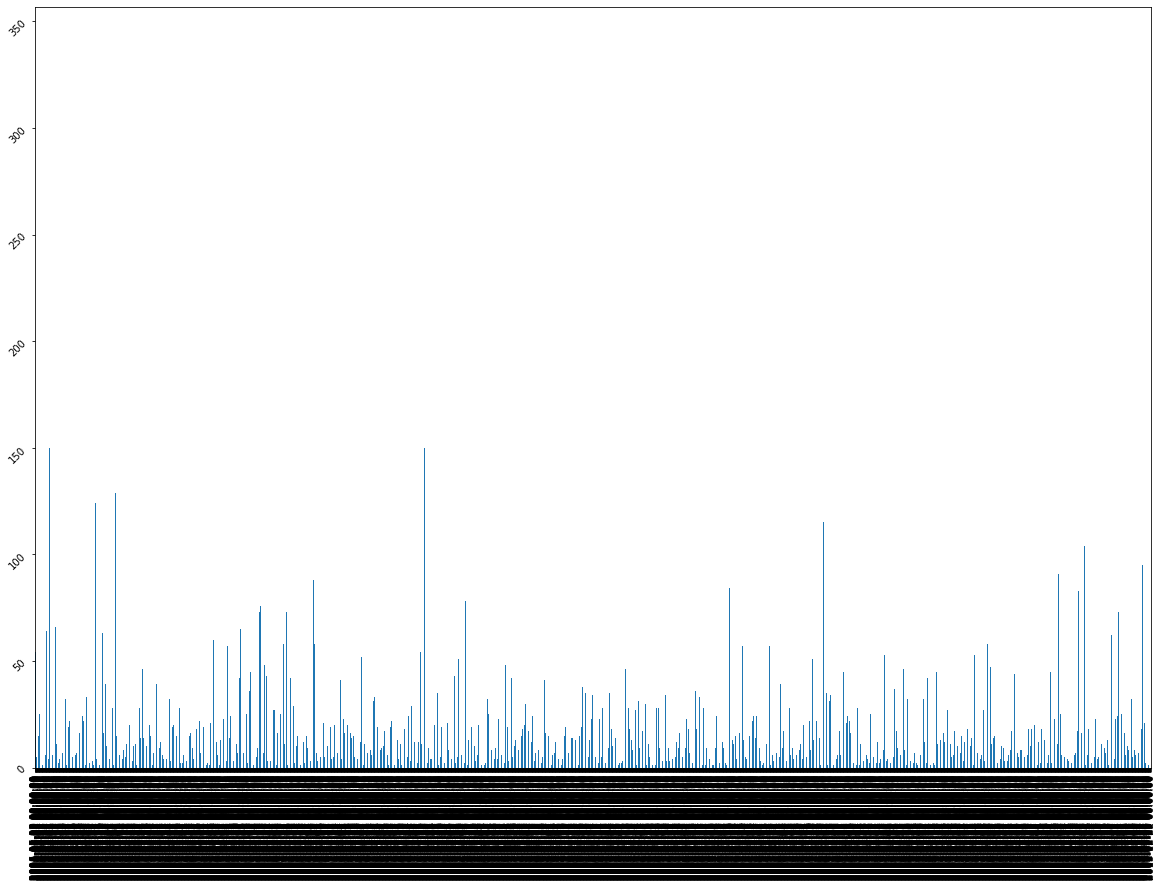

In [14]:
plt.figure(figsize = (20, 14))
df.index.value_counts(sort = False).plot(kind = "bar")
plt.yticks(rotation = 45)
plt.show()

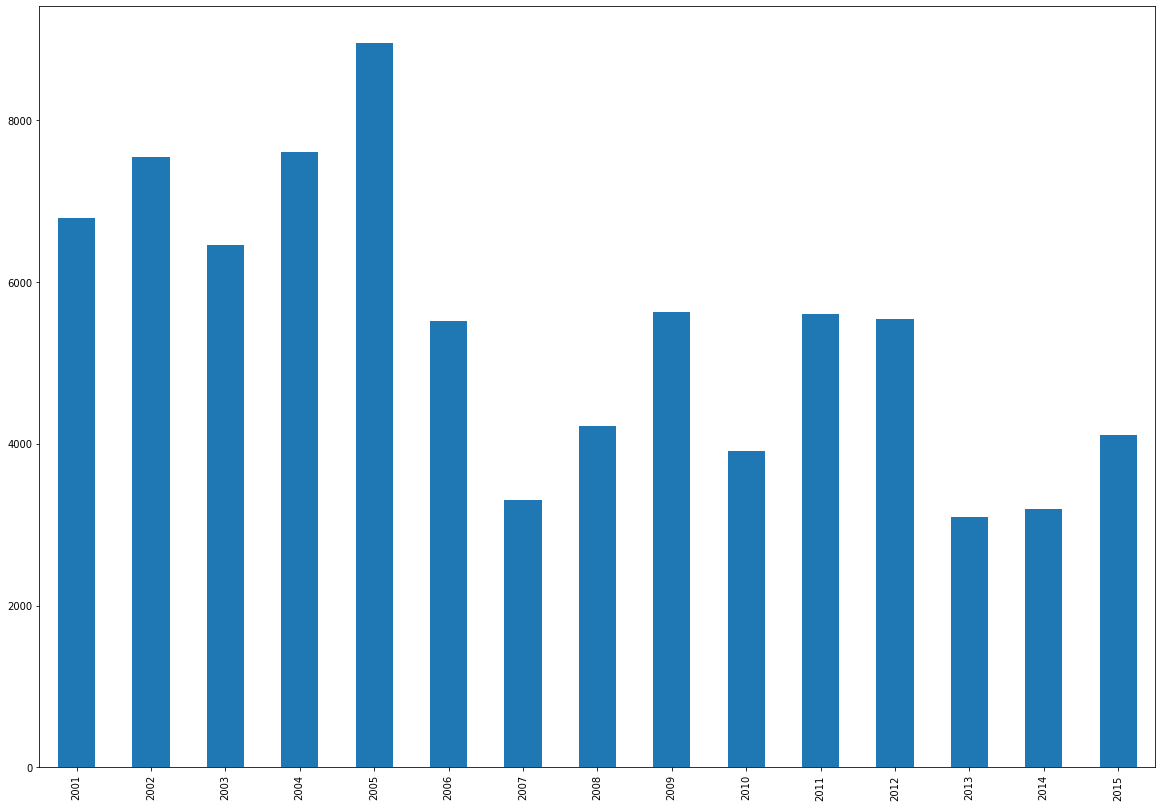

In [17]:
plt.figure(figsize = (20, 14))
df.index.year.value_counts(sort = False).plot(kind = "bar")
plt.show()

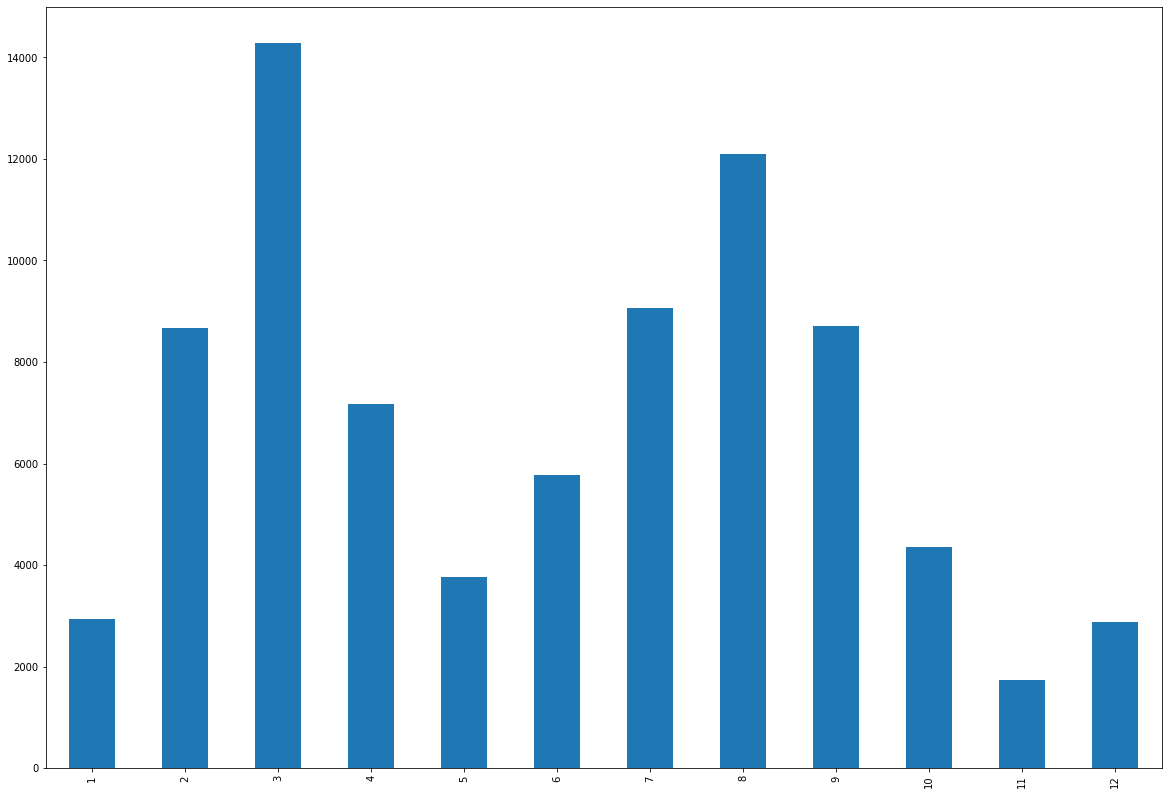

In [18]:
plt.figure(figsize = (20, 14))
df.index.month.value_counts(sort = False).plot(kind = "bar")
plt.show()

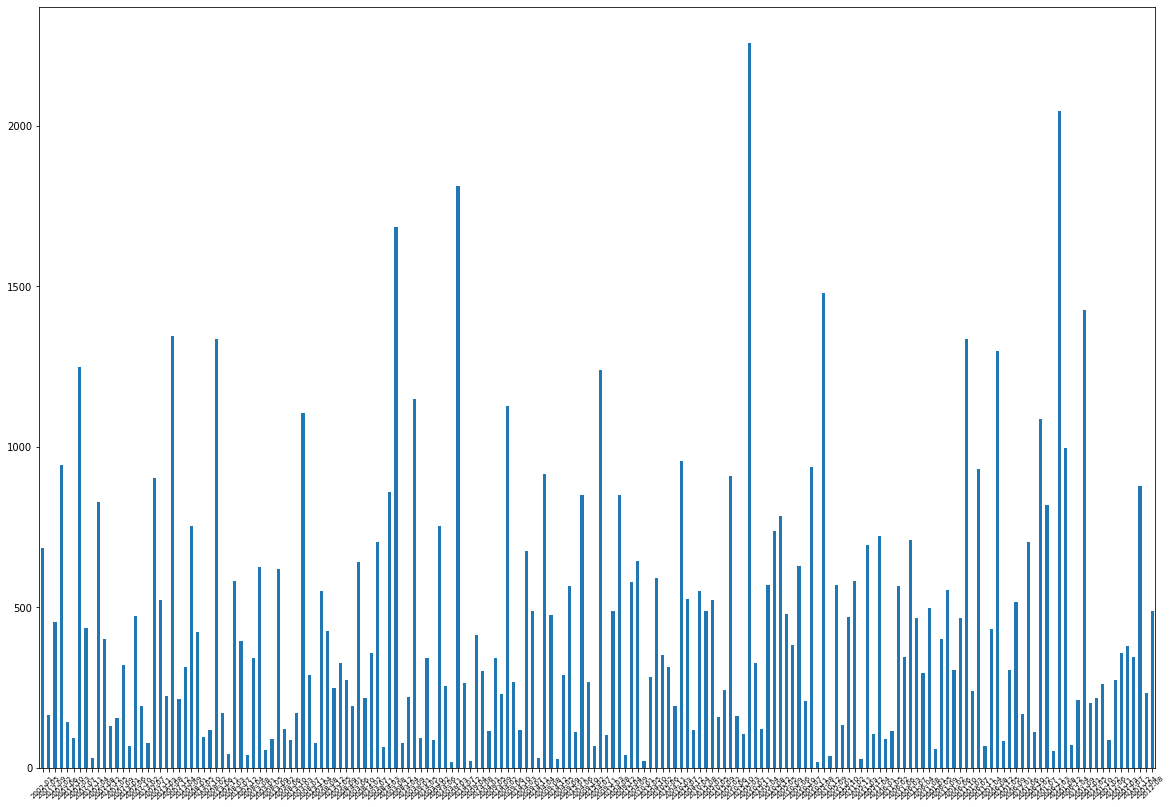

In [25]:
plt.figure(figsize = (20, 14))
df.index.to_period("M").value_counts(sort = False).plot(kind = "bar")
plt.xticks(fontsize = 7, rotation = 45)
plt.show()

In [2]:
#add spain column so that tableau can get latitude and longitude
df = pd.read_csv("clean_fires.csv", parse_dates = ["fecha"], index_col = "fecha")
df.insert(0, 'pais', 'spain')
df.head()

pais  superficie        lat       lng  idprovincia  \
fecha                                                             
2001-03-18  spain        3.70  42.954656 -2.325719  Araba/Álava   
2001-03-24  spain        1.50  42.552183 -2.640673  Araba/Álava   
2001-04-16  spain        1.50  48.302507 -3.397798  Araba/Álava   
2001-05-25  spain        7.50  42.946479 -2.485163  Araba/Álava   
2001-07-20  spain        1.04  43.091715 -3.024574  Araba/Álava   

                      municipio         causa  causa_supuesta  time_ctrl  \
fecha                                                                      
2001-03-18            BARRUNDIA  intencionado             0.0        150   
2001-03-24            NAVARIDAS     accidente             1.0        275   
2001-04-16  LAPUEBLA DE LABARCA     accidente             0.0        135   
2001-05-25            BARRUNDIA  intencionado             0.0        335   
2001-07-20          AIARA/AYALA   desconocido             0.0         45   

            time_ext  personal  medios      tipo  
fecha                                             
2001-03-18       180        10       2  incendio  
2001-03-24       290         4       1  incendio  
2001-04-16       165         4       1  incendio  
2001-05-25       410         6       1  incendio  
2001-07-20        75        11       2  incendio

In [3]:
#drop lat and lng as they are wrong
df = df.drop(["lat"], axis = 1)
df = df.drop(["lng"], axis = 1)

df.head()

pais  superficie  idprovincia            municipio         causa  \
fecha                                                                           
2001-03-18  spain        3.70  Araba/Álava            BARRUNDIA  intencionado   
2001-03-24  spain        1.50  Araba/Álava            NAVARIDAS     accidente   
2001-04-16  spain        1.50  Araba/Álava  LAPUEBLA DE LABARCA     accidente   
2001-05-25  spain        7.50  Araba/Álava            BARRUNDIA  intencionado   
2001-07-20  spain        1.04  Araba/Álava          AIARA/AYALA   desconocido   

            causa_supuesta  time_ctrl  time_ext  personal  medios      tipo  
fecha                                                                        
2001-03-18             0.0        150       180        10       2  incendio  
2001-03-24             1.0        275       290         4       1  incendio  
2001-04-16             0.0        135       165         4       1  incendio  
2001-05-25             0.0        335       410         6       1  incendio  
2001-07-20             0.0         45        75        11       2  incendio

In [4]:
print("Cleaned dataset size:", df.shape)

Cleaned dataset size: (81433, 11)


In [5]:
#save it into a new csv
df.to_csv("clean_fires.csv")

In [9]:
df = pd.read_csv("clean_fires.csv", parse_dates = ["fecha"], index_col = "fecha")

In [10]:
df_sample = df.sample(frac = 0.25, random_state = 8)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#normalize numeric atributes
x = df_sample[["superficie", "time_ctrl", "time_ext", "personal", "medios"]]
norm = MinMaxScaler().fit_transform(x)

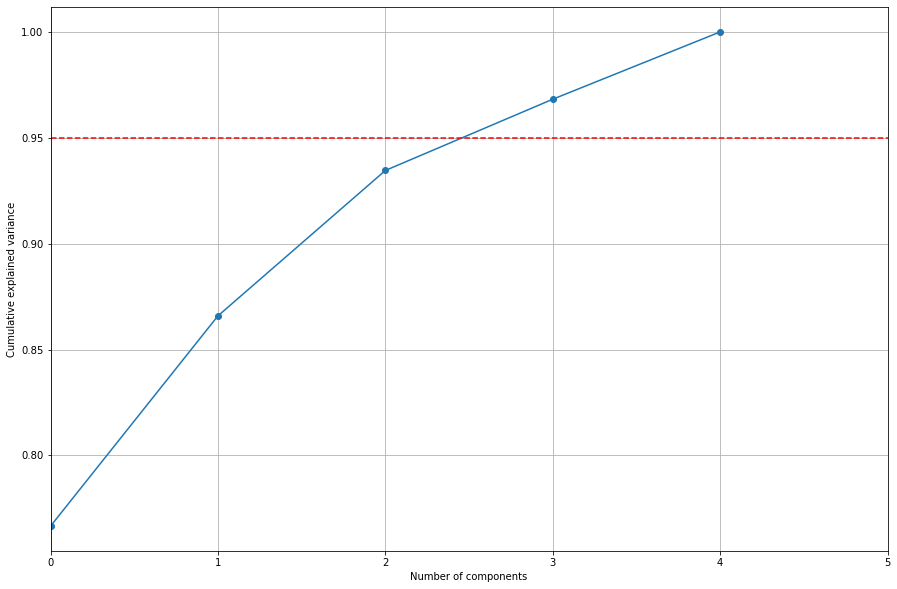

In [12]:
pca = PCA().fit(norm)
plt.figure(figsize = (15, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o")
plt.axhline(0.95, color = "r", linestyle = "--")
plt.xlim([0, 5])
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()

We will pick 3 as the number of components for the PCA of only the numerical values, as it is the lowest number we can choose with more than 95% cumulative explained variance.

In [5]:
#apply pca to the data
pca_components = PCA(n_components = 3).fit_transform(norm)

In [6]:
#creating a dataframe with the pca numerical only values
pca_df = pd.DataFrame(data = pca_components, columns = ["pca1", "pca2", "pca3"])

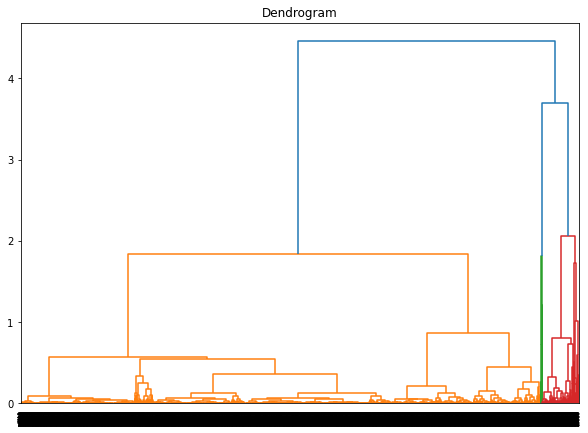

In [7]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))  
plt.title("Dendrogram")  
shc.dendrogram(shc.linkage(pca_df, method = "ward"))
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")  
agglo.fit_predict(pca_df)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
pca_df["predicted_cluster"] = agglo.labels_

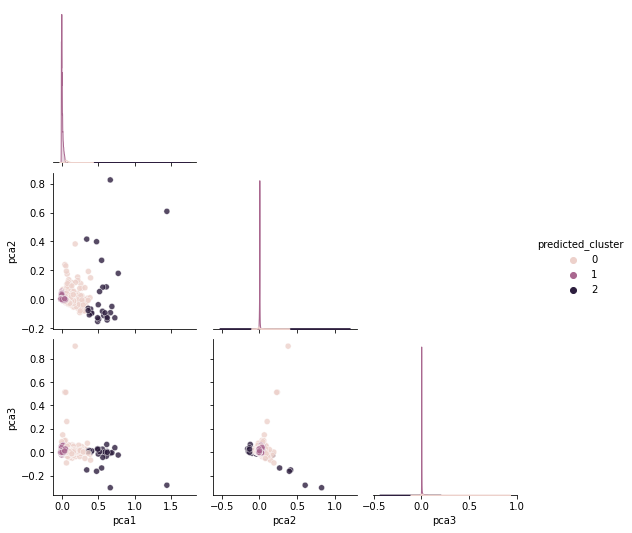

In [13]:
#matrix plot of the clusters' distribution amng the pca 
sns.pairplot(pca_df, diag_kind = "auto", corner = True, hue = "predicted_cluster", plot_kws = dict(alpha = 0.8))
plt.show()

In [14]:
pca_df.to_csv("pca_numerical_only.csv")

In [13]:
dummy = pd.get_dummies(data = df, columns = ["idprovincia", "causa"])
df_dummy = pd.concat([df, dummy], axis = 1)

In [14]:
df_dummy.head()

pais  superficie  idprovincia            municipio         causa  \
fecha                                                                           
2001-03-18  spain        3.70  Araba/Álava            BARRUNDIA  intencionado   
2001-03-24  spain        1.50  Araba/Álava            NAVARIDAS     accidente   
2001-04-16  spain        1.50  Araba/Álava  LAPUEBLA DE LABARCA     accidente   
2001-05-25  spain        7.50  Araba/Álava            BARRUNDIA  intencionado   
2001-07-20  spain        1.04  Araba/Álava          AIARA/AYALA   desconocido   

            causa_supuesta  time_ctrl  time_ext  personal  medios  ...  \
fecha                                                              ...   
2001-03-18             0.0        150       180        10       2  ...   
2001-03-24             1.0        275       290         4       1  ...   
2001-04-16             0.0        135       165         4       1  ...   
2001-05-25             0.0        335       410         6       1  ...   
2001-07-20             0.0         45        75        11       2  ...   

           idprovincia_Valencia/València idprovincia_Valladolid  \
fecha                                                             
2001-03-18                             0                      0   
2001-03-24                             0                      0   
2001-04-16                             0                      0   
2001-05-25                             0                      0   
2001-07-20                             0                      0   

            idprovincia_Zamora idprovincia_Zaragoza  idprovincia_Ávila  \
fecha                                                                    
2001-03-18                   0                    0                  0   
2001-03-24                   0                    0                  0   
2001-04-16                   0                    0                  0   
2001-05-25                   0                    0                  0   
2001-07-20                   0                    0                  0   

            causa_accidente  causa_desconocido  causa_intencionado  \
fecha                                                                
2001-03-18                0                  0                   1   
2001-03-24                1                  0                   0   
2001-04-16                1                  0                   0   
2001-05-25                0                  0                   1   
2001-07-20                0                  1                   0   

            causa_rayo causa_reproducido  
fecha                                     
2001-03-18           0                 0  
2001-03-24           0                 0  
2001-04-16           0                 0  
2001-05-25           0                 0  
2001-07-20           0                 0  

[5 rows x 76 columns]

In [15]:
dummy_sample = df_dummy.sample(frac = 0.25, random_state = 8)

In [53]:
print("Shape of the sampled dummy dataframe:", dummy_sample.shape)

Shape of the sampled dummy dataframe: (20358, 76)


In [16]:
#normalize numeric and dummy atributes
x = dummy_sample.drop(columns = ["pais", "municipio", "tipo", "idprovincia", "causa"])
norm = MinMaxScaler().fit_transform(x)

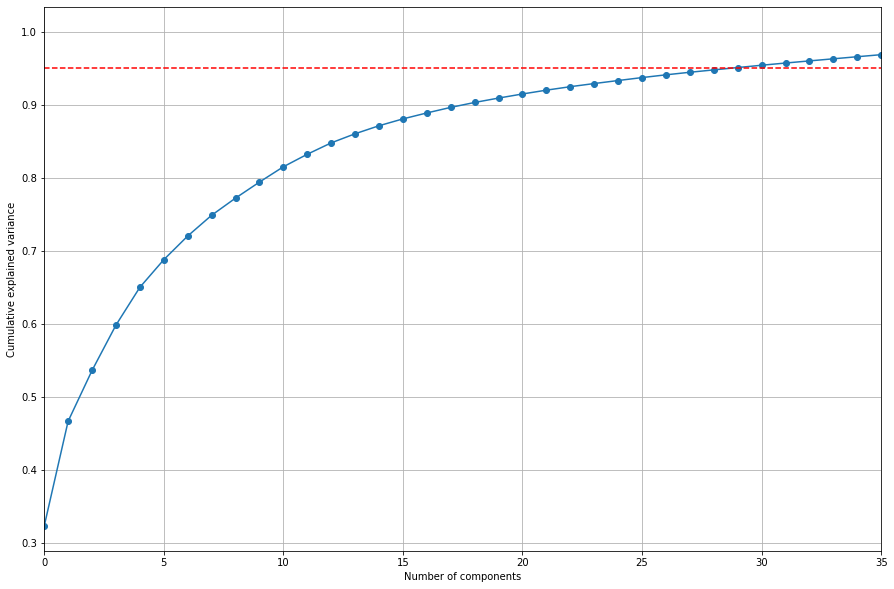

In [18]:
pca = PCA().fit(norm)
plt.figure(figsize = (15, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o")
plt.axhline(0.95, color = "r", linestyle = "--")
plt.xlim([0, 35])
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

The above plot shows that we can pick 30 as the number of components for our PCA having a 95% cumulative explained variance, which is a reduction of more than half compared to the initial data.

In [57]:
#apply pca to the data
pca_components_dummy = PCA(n_components = 30).fit_transform(norm)

In [58]:
#creating a dataframe with the pca numerical only values
pca_df_dummy = pd.DataFrame(data = pca_components_dummy)

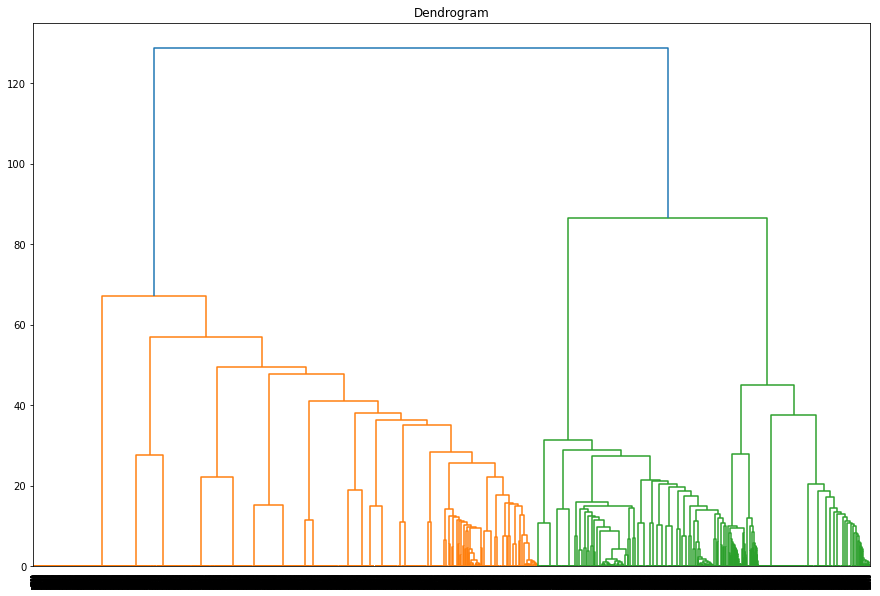

In [39]:
plt.figure(figsize = (15, 10))  
plt.title("Dendrogram")  
shc.dendrogram(shc.linkage(pca_df_dummy, method = "ward"))
plt.show()

In [59]:
agglo_dummy = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")  
agglo_dummy.fit_predict(pca_df_dummy)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [60]:
pca_df_dummy["predicted_cluster"] = agglo_dummy.labels_

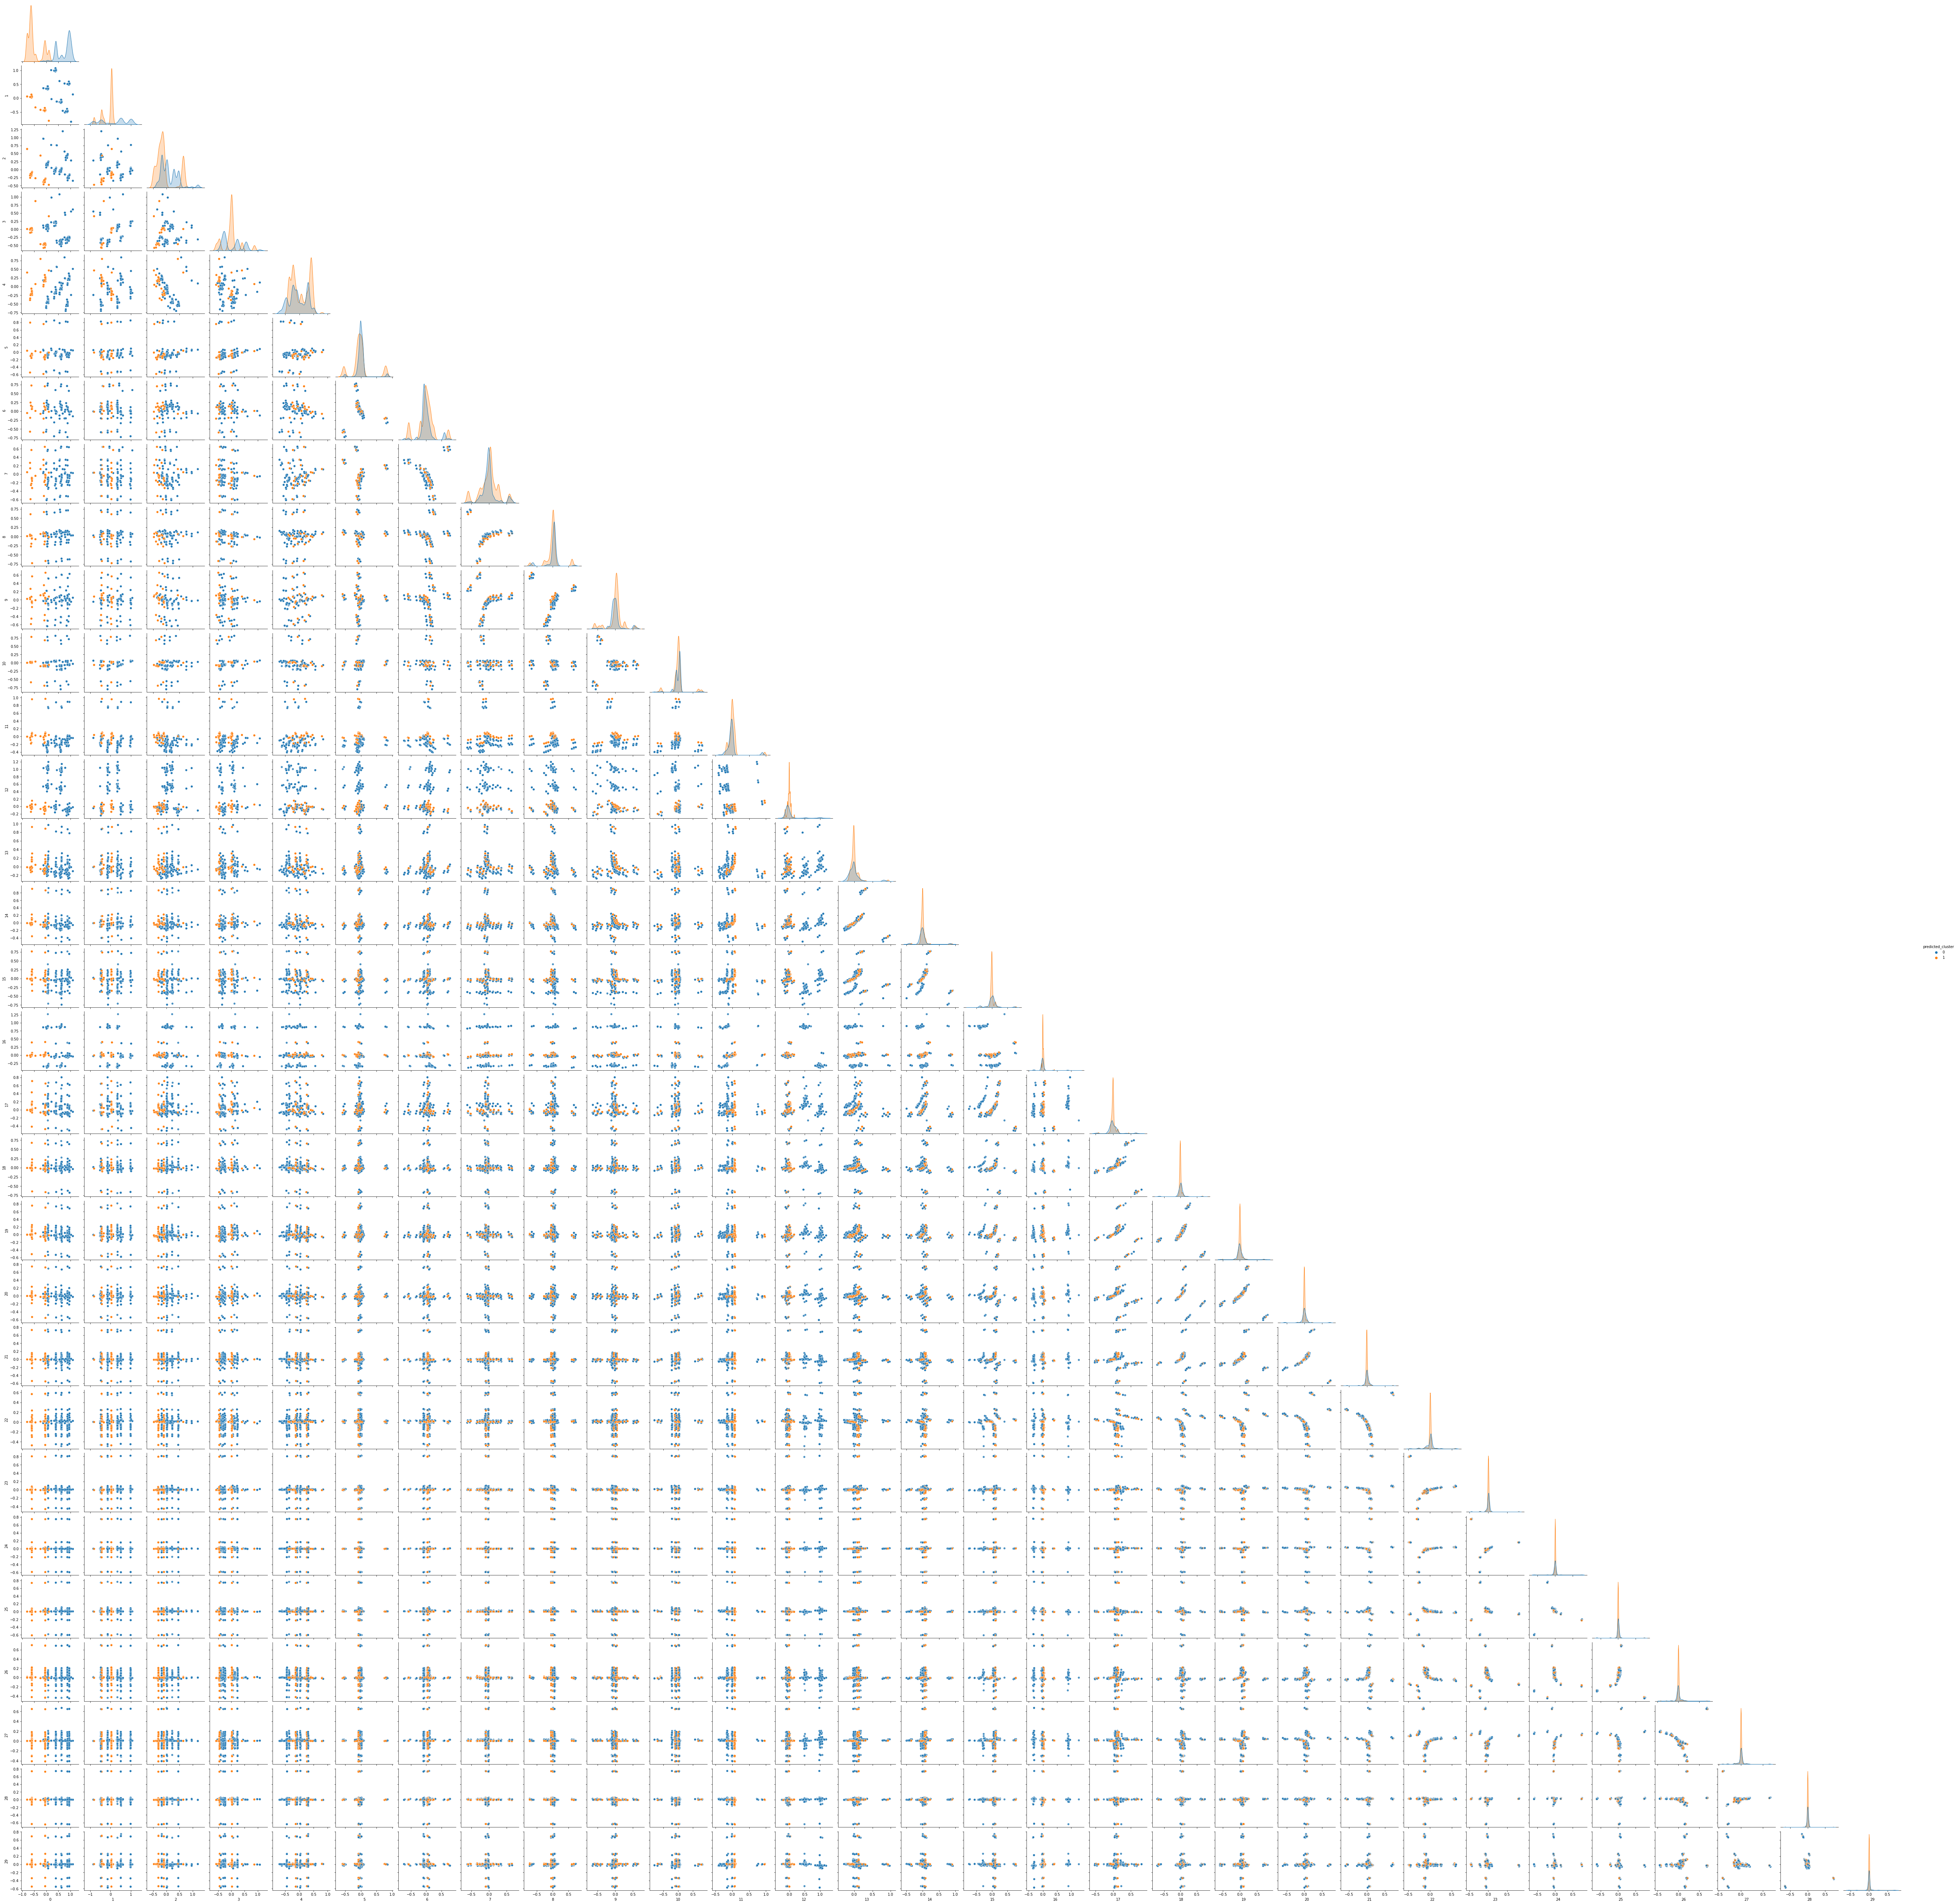

In [42]:
#matrix plot of the clusters' distribution amng the pca 
sns.pairplot(pca_df_dummy, diag_kind = "auto", corner = True, hue = "predicted_cluster", plot_kws = dict(alpha = 0.8))
plt.show()

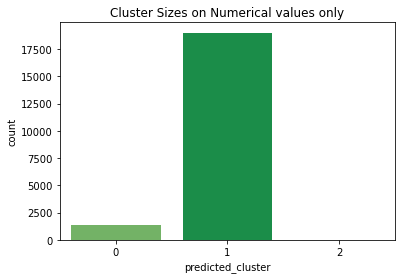

In [61]:
sns.countplot(x = pca_df.predicted_cluster, palette = ["#6bbf59", "#08a045", "#0b6e4f"]).set(
    title = "Cluster Sizes on Numerical values only")
plt.show()

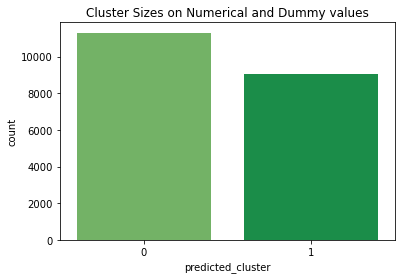

In [62]:
sns.countplot(x = pca_df_dummy.predicted_cluster, palette = ["#6bbf59", "#08a045"]).set(
    title = "Cluster Sizes on Numerical and Dummy values")
plt.show()

In [49]:
df_sample["predicted_cluster"] = agglo.labels_
df_sample.to_csv("fires_numerical_only.csv")

In [63]:
dummy_sample["predicted_cluster"] = agglo_dummy.labels_
dummy_sample.to_csv("fires_numerical_dummy.csv")

In [65]:
from sklearn.metrics import silhouette_score

num_silhouette = silhouette_score(pca_components, agglo.labels_).round(2)

dum_silhouette = silhouette_score(pca_components_dummy, agglo_dummy.labels_).round(2)

In [68]:
print("Silhouette score for numerical only clusters:", num_silhouette)

Silhouette score for numerical only clusters: 0.79


In [69]:
print("Silhouette score for numerical and dummy clusters:", dum_silhouette)

Silhouette score for numerical and dummy clusters: 0.27


C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


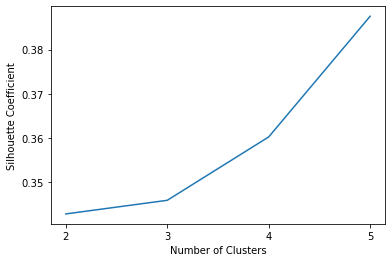

In [70]:
silhouette_coefficients = []

for k in range(2, 6):
    agglo_dummy = AgglomerativeClustering(n_clusters = k, affinity = "euclidean", linkage = "ward")
    agglo_dummy.fit(pca_df_dummy)
    score = silhouette_score(pca_df_dummy, agglo_dummy.labels_)
    silhouette_coefficients.append(score)

#plotting silhouette score vs number of clusters    
plt.plot(range(2, 6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nuria\anaconda3\lib

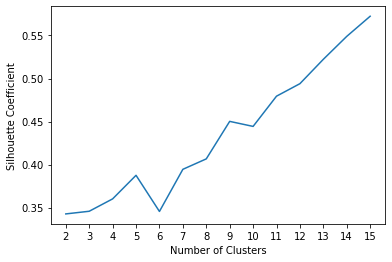

In [71]:
silhouette_coefficients = []

for k in range(2, 16):
    agglo_dummy = AgglomerativeClustering(n_clusters = k, affinity = "euclidean", linkage = "ward")
    agglo_dummy.fit(pca_df_dummy)
    score = silhouette_score(pca_df_dummy, agglo_dummy.labels_)
    silhouette_coefficients.append(score)

#plotting silhouette score vs number of clusters    
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [5]:
df1 = pd.read_csv("fires_numerical_only.csv")
df2 = pd.read_csv("fires_numerical_dummy.csv")

In [6]:
df1.head()

fecha   pais  superficie idprovincia          municipio         causa  \
0  2005-02-21  spain        7.23      Madrid        VALDARACETE     accidente   
1  2014-06-26  spain        2.09   Salamanca          SALAMANCA  intencionado   
2  2007-05-09  spain        2.00    Asturias  CANGAS DEL NARCEA     accidente   
3  2005-05-30  spain        4.14        León         VILLAMAÑAN     accidente   
4  2001-05-11  spain        2.00     Ourense            BOBORÁS  intencionado   

   causa_supuesta  time_ctrl  time_ext  personal  medios      tipo  \
0             0.0         91       200        25       3  incendio   
1             1.0         56        86         9       3  incendio   
2             0.0        145       370        21       2  incendio   
3             1.0         82        83        17       2  incendio   
4             1.0         50        80         6       1  incendio   

   predicted_cluster  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1

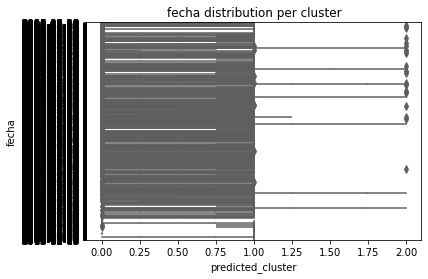

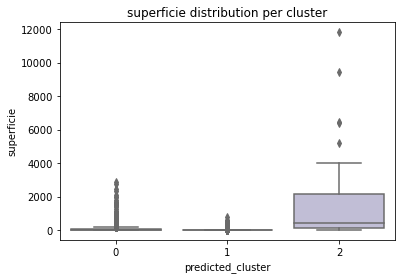

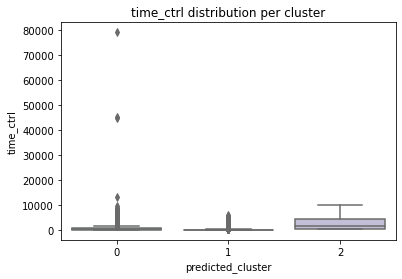

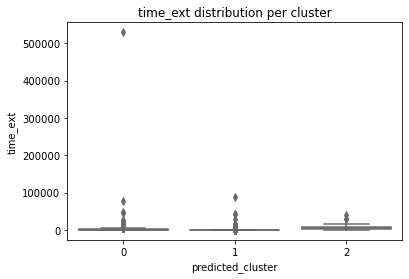

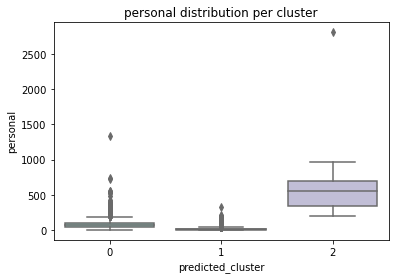

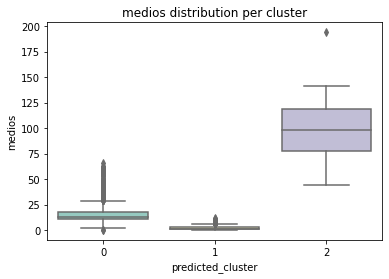

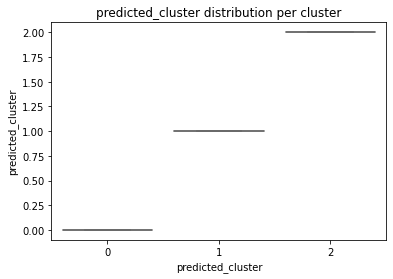

In [8]:
skip = ["pais", "idprovincia", "municipio", "causa", "causa_supuesta", "tipo"]

for i in df1:
    if i in skip:
        continue
    sns.boxplot(data = df1, y = i, x = "predicted_cluster", palette = "Set3")
    plt.title("{} distribution per cluster".format(i))
    plt.show()

In [9]:
df2.head()

fecha   pais  superficie idprovincia          municipio         causa  \
0  2005-02-21  spain        7.23      Madrid        VALDARACETE     accidente   
1  2014-06-26  spain        2.09   Salamanca          SALAMANCA  intencionado   
2  2007-05-09  spain        2.00    Asturias  CANGAS DEL NARCEA     accidente   
3  2005-05-30  spain        4.14        León         VILLAMAÑAN     accidente   
4  2001-05-11  spain        2.00     Ourense            BOBORÁS  intencionado   

   causa_supuesta  time_ctrl  time_ext  personal  ...  idprovincia_Valladolid  \
0             0.0         91       200        25  ...                       0   
1             1.0         56        86         9  ...                       0   
2             0.0        145       370        21  ...                       0   
3             1.0         82        83        17  ...                       0   
4             1.0         50        80         6  ...                       0   

  idprovincia_Zamora idprovincia_Zaragoza  idprovincia_Ávila causa_accidente  \
0                  0                    0                  0               1   
1                  0                    0                  0               0   
2                  0                    0                  0               1   
3                  0                    0                  0               1   
4                  0                    0                  0               0   

   causa_desconocido  causa_intencionado  causa_rayo  causa_reproducido  \
0                  0                   0           0                  0   
1                  0                   1           0                  0   
2                  0                   0           0                  0   
3                  0                   0           0                  0   
4                  0                   1           0                  0   

   predicted_cluster  
0                  0  
1                  1  
2                  0  
3                  0  
4                  1  

[5 rows x 78 columns]

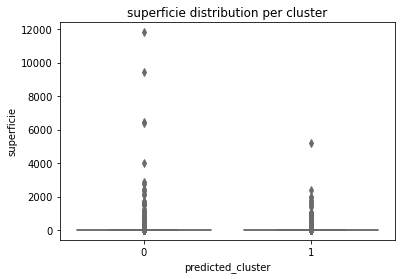

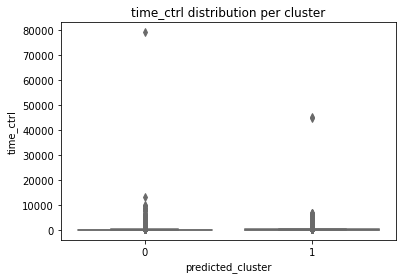

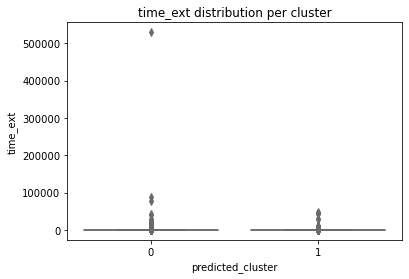

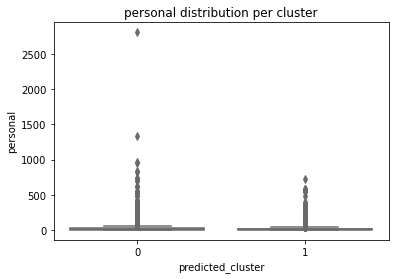

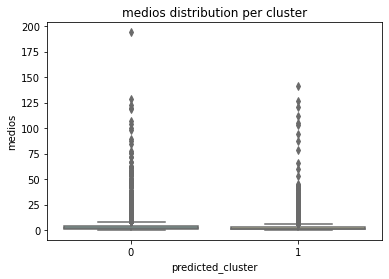

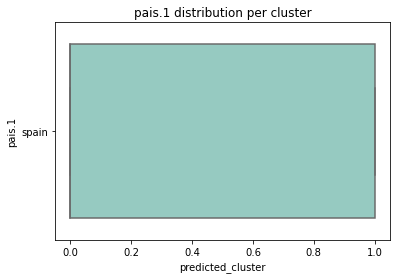

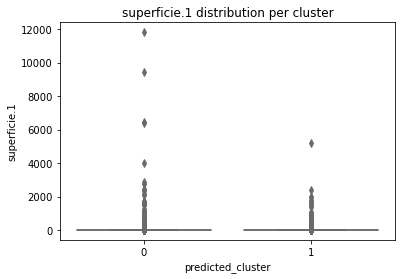

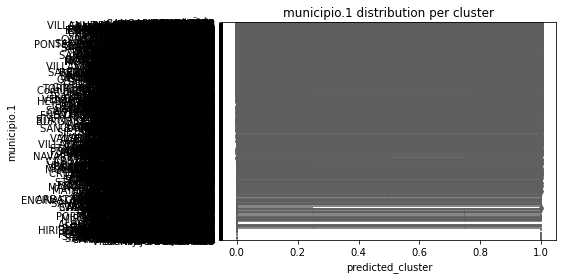

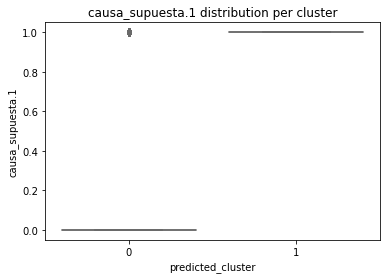

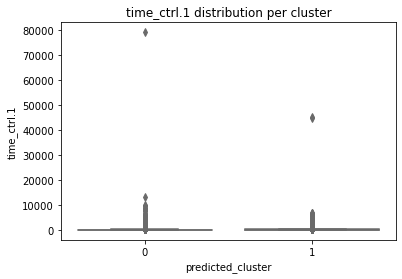

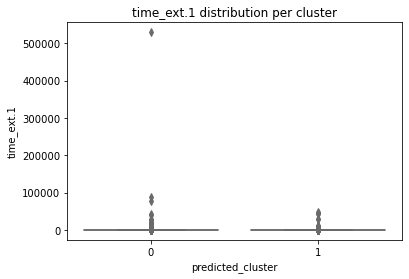

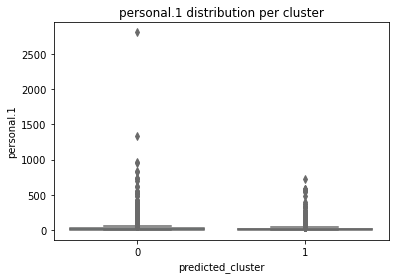

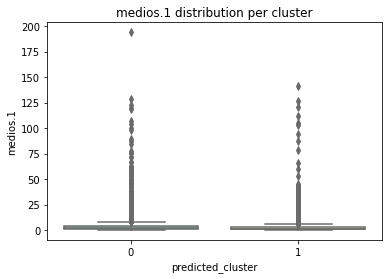

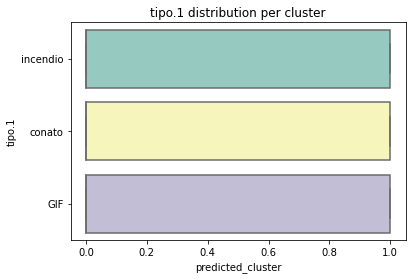

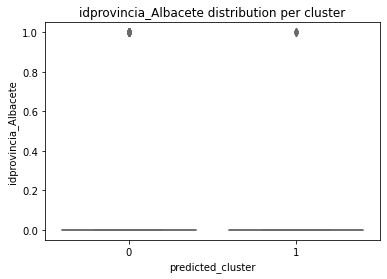

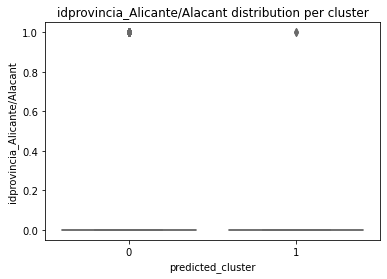

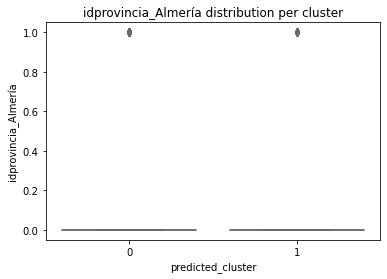

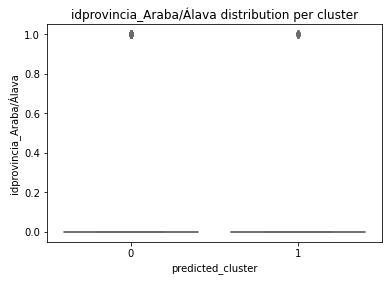

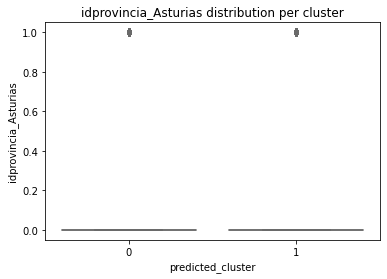

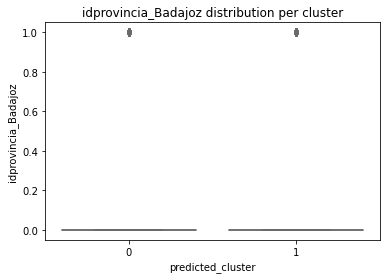

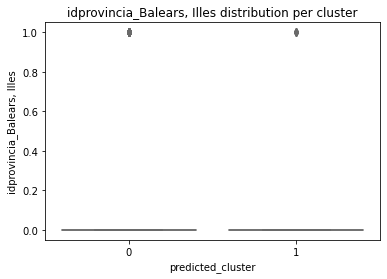

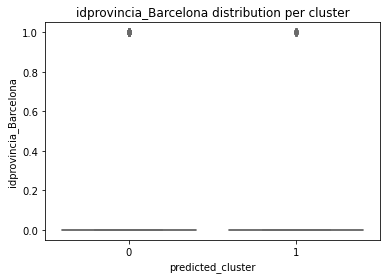

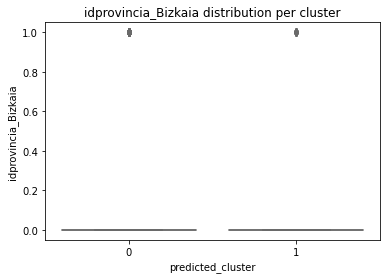

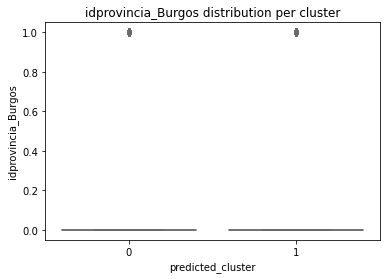

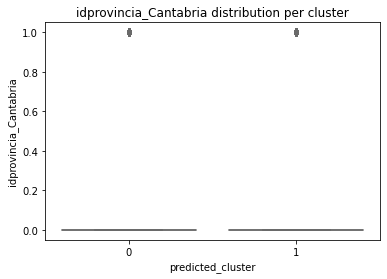

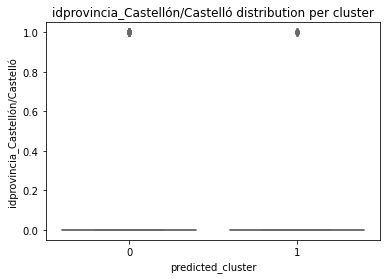

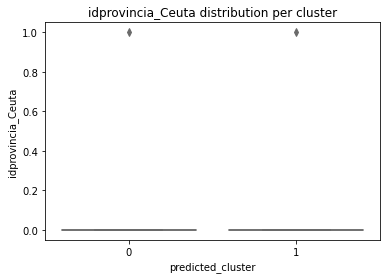

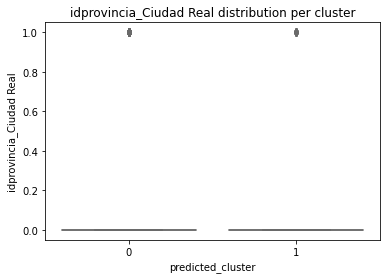

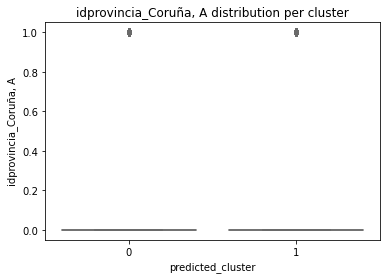

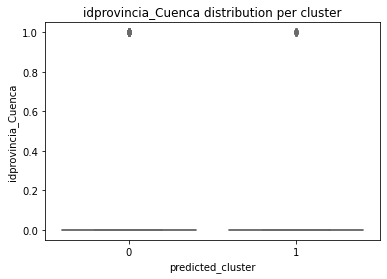

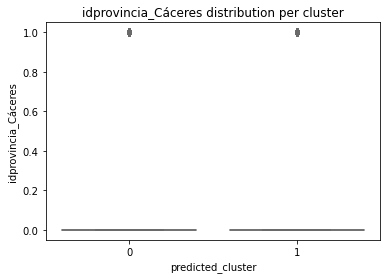

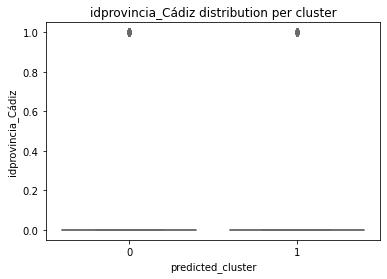

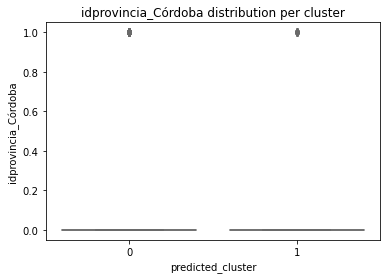

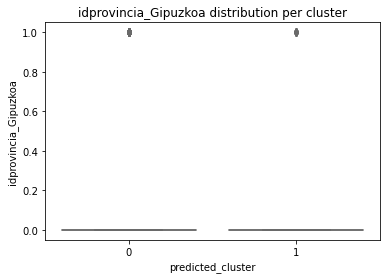

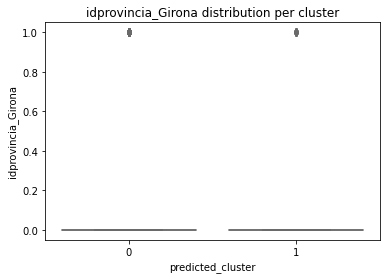

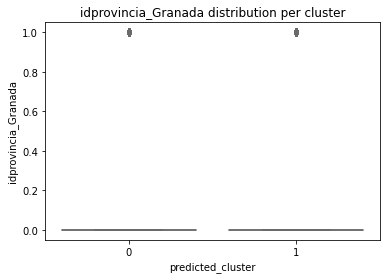

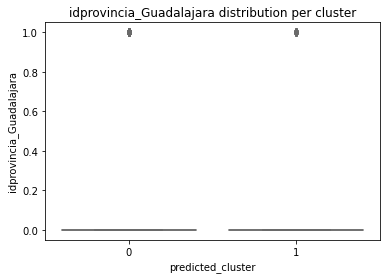

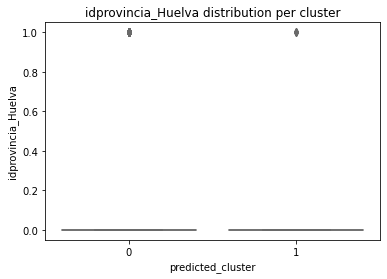

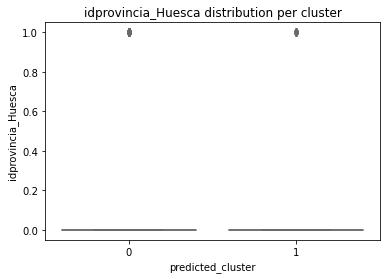

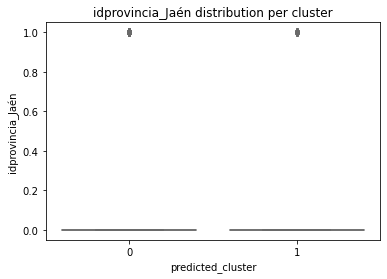

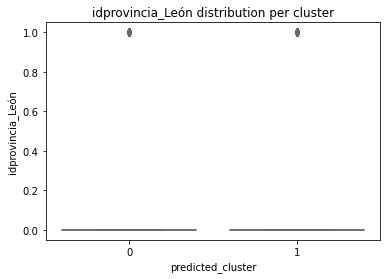

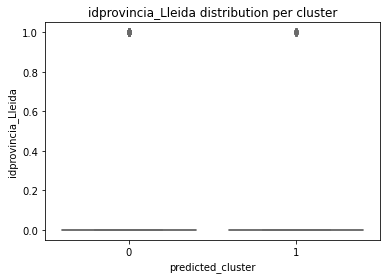

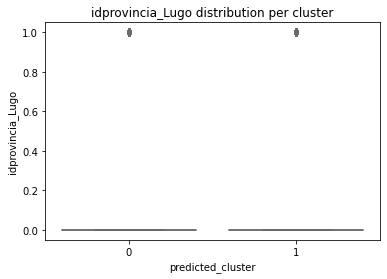

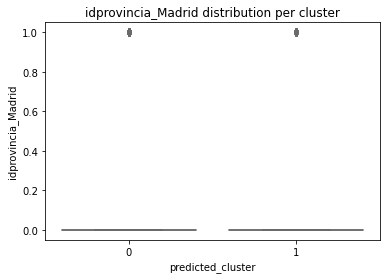

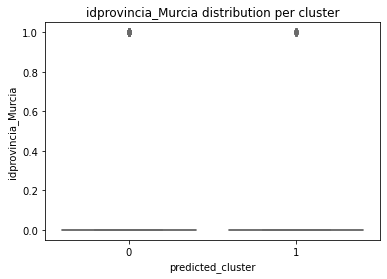

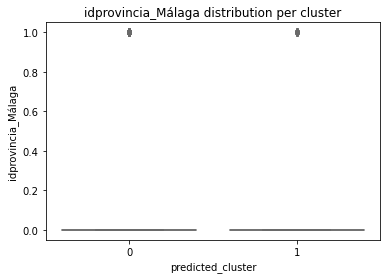

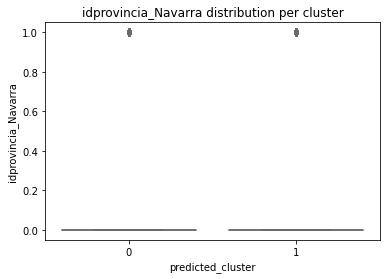

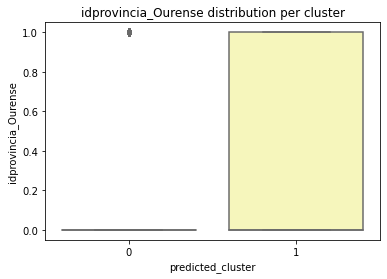

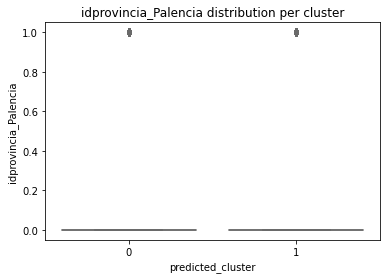

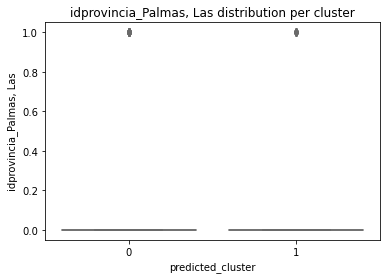

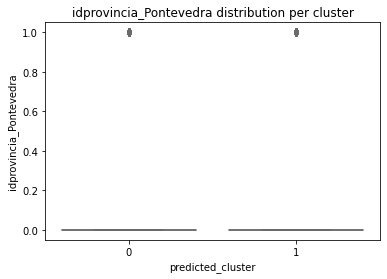

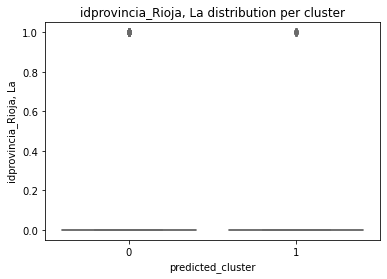

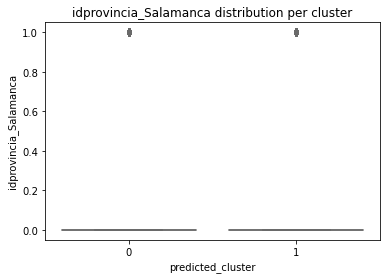

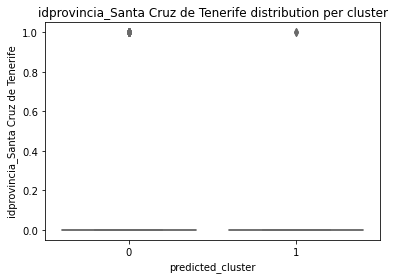

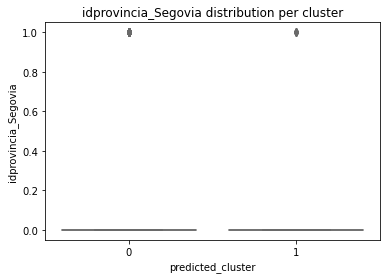

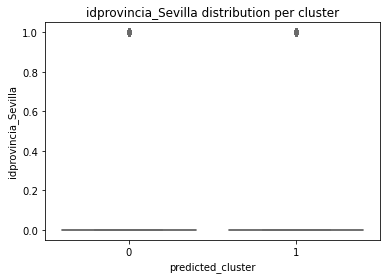

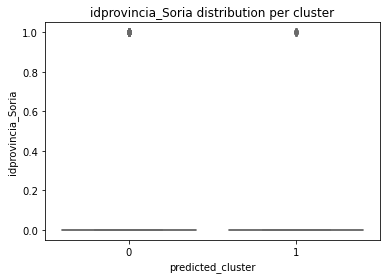

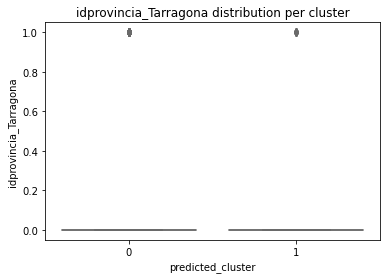

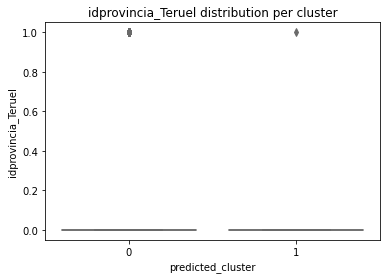

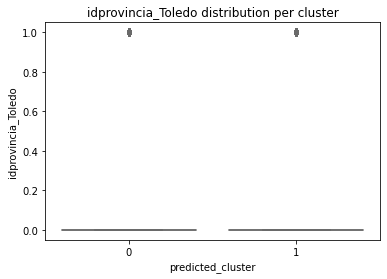

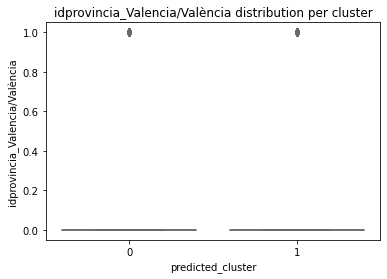

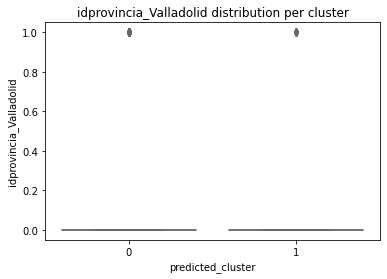

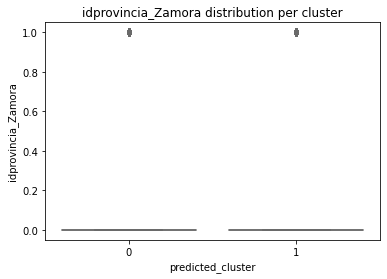

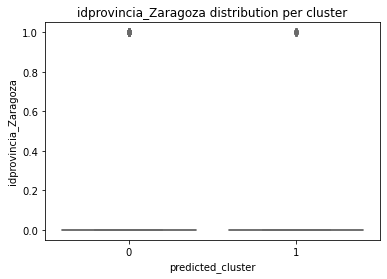

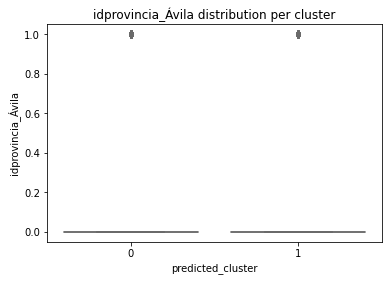

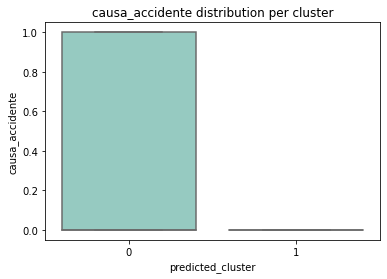

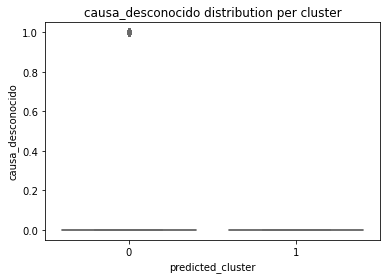

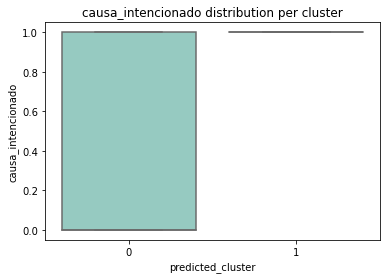

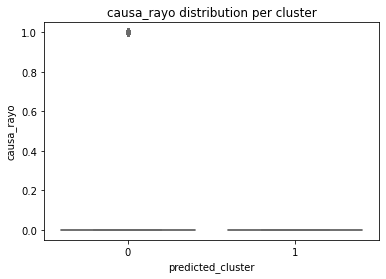

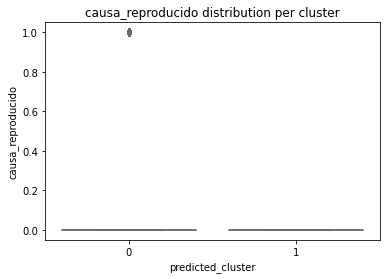

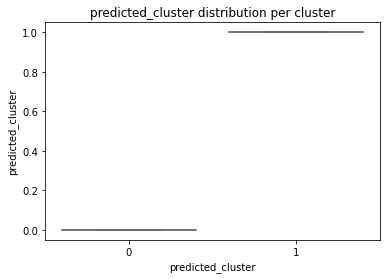

In [11]:
skip = [ "fecha","pais", "idprovincia", "municipio", "causa", "causa_supuesta", "tipo"]

for i in df2:
    if i in skip:
        continue
    sns.boxplot(data = df2, y = i, x = "predicted_cluster", palette = "Set3")
    plt.title("{} distribution per cluster".format(i))
    plt.show()

In [76]:
from sklearn.metrics import adjusted_rand_score

ari_num = adjusted_rand_score(pca_df.columns.values, agglo.labels_)

ari_dum = adjusted_rand_score(pca_df_dummy.columns.values, agglo_dummy.labels_)

ValueError: Found input variables with inconsistent numbers of samples: [4, 20358]

https://www.miteco.gob.es/es/biodiversidad/servicios/banco-datos-naturaleza/informacion-disponible/mfe50.aspx


In [5]:
%%html 
<div class='tableauPlaceholder' id='viz1658342085883' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;wi&#47;wildfires_16577065748760&#47;Hoja2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='wildfires_16577065748760&#47;Hoja2' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;wi&#47;wildfires_16577065748760&#47;Hoja2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='es-ES' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1658342085883');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [6]:
%%html
<div class='tableauPlaceholder' id='viz1658342109287' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;wi&#47;wildfiresmap&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='wildfiresmap&#47;Sheet1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;wi&#47;wildfiresmap&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='es-ES' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1658342109287');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [1]:
%%html
<div class='tableauPlaceholder' id='viz1658401220618' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GP&#47;GPRTG9ZNK&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;GPRTG9ZNK' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GP&#47;GPRTG9ZNK&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='es-ES' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1658401220618');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>